# Chromagram Extraction and Analysis
### for chord recognition tasks

In [14]:
import librosa, librosa.display
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Util Informations

### Model Evaluation
For a Machine Learning based model, we have
  CSR: Chord Symbol Recall and 
  CMR: Chord Match Recall

### Processing Options

Spectrum Optimization (temporal window application)
  Bartlett,
  Hann,
  Kaiser

Denoising/Whitening
  using low pass filter

In [9]:
# VARIABLES
seconds = 5
song_title = 'nutcracker'

# get audio in a float point vector format, at 22050 Hz sampling rate
audio, samp_rate = librosa.load(librosa.ex(song_title), duration=seconds, sr=None) # load 1min of an audio with sampling rate set to native

# compute the Fast Fourier Transform (FFT)
fhat = np.fft.fft(audio, samp_rate)

# get Power Spectrum Density (PSD)
PSD = fhat * np.conj(fhat)/samp_rate

In [10]:
# get chromagram with Bartlett window and Short Time Fourier Transform
chroma = librosa.feature.chroma_stft(y=audio, sr=samp_rate, window="bartlett")  # get chroma with bartlett window and short time fourier transform
chroma

array([[1.        , 0.9691573 , 0.75038505, ..., 0.04037511, 0.05225065,
        0.21892062],
       [0.67958623, 0.7353966 , 0.6104028 , ..., 0.1481413 , 0.1891561 ,
        0.47507438],
       [0.93435526, 1.        , 1.        , ..., 0.28896707, 0.36007687,
        0.8354428 ],
       ...,
       [0.6621779 , 0.795174  , 0.6848035 , ..., 0.00483969, 0.0136094 ,
        0.09213852],
       [0.47203305, 0.6100945 , 0.8622968 , ..., 0.00596912, 0.01259233,
        0.10611239],
       [0.6841493 , 0.7191403 , 0.982753  , ..., 0.01764046, 0.01915073,
        0.14035514]], dtype=float32)

[Text(0.5, 1.0, 'Chromagram')]

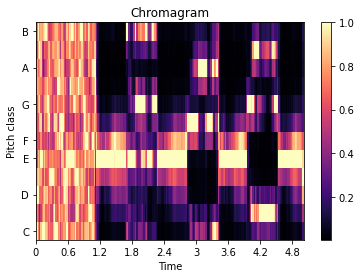

In [11]:
# visualize chromagram
fig, ax = plt.subplots()
img = librosa.display.specshow(chroma, y_axis="chroma", x_axis="time", ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title="Chromagram")

In [28]:
# dataframe representation of chroma vectors
c = pd.DataFrame(chroma)

# time point and pitch
t_bin, pitch = 0, 0

# get pitch intensity at time t_bin
c[t_bin][pitch]

1.0